In [1]:
import pandas as pd
import matplotlib as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from datetime import date, timedelta
from IPython.display import display
import seaborn as sns

In [2]:
header_by_day = ["#","Country","Date","TotalCases","NewCases","TotalDeaths","NewDeaths","TotalRecovered","NewRecovered",
"ActiveCases","Serious,Critical","Tot Cases/1M pop","Deaths/1M pop","TotalTests","Tests/1M pop","Population","Continent"]

header_by_week = ["#", "Country", "Cases in the last 7 days", "Cases in the preceding 7 days",
"Weekly case /%/ change", "Cases in the last 7 days/1M pop", "Deaths in the last 7 days", 
"Deaths in the preceding 7 days", "Weekly Death /%/ change", "Deaths in the last 7 days/1M pop", "Population", "Continent"]

In [3]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def convert_numeric(num):
    condition = {",":"","+":"","%":""}
    if num == "nan" or num == " " or num == "  " or num == " N/A":
        return 0

    for i, j in condition.items():
        num = num.replace(i, j)
    if RepresentsInt(num) == True:
        return int(num)
    return float(num)

In [4]:
df_covid_by_day = pd.read_csv('Corona_by_day.tsv',sep='\t')

In [5]:
for i in range(3,16):
    df_covid_by_day[header_by_day[i]] = df_covid_by_day[header_by_day[i]].apply(lambda x:convert_numeric(str(x)))
    
df_covid_by_day[header_by_day[16]] = df_covid_by_day[header_by_day[16]].apply(lambda x:str(x).replace(" ",""))
df_covid_by_day['Date'] = pd.to_datetime(df_covid_by_day['Date'],format="%d-%m-%Y")

In [6]:
df_covid_by_week = pd.read_csv('Corona_by_week.tsv',sep='\t')

In [7]:
for i in range(2,11):
    df_covid_by_week[header_by_week[i]] = df_covid_by_week[header_by_week[i]].apply(lambda x:convert_numeric(str(x)))
    
df_covid_by_week[header_by_week[-1]] = df_covid_by_week[header_by_week[-1]].apply(lambda x:str(x).replace(" ",""))

In [8]:
df_covid_by_day

,#,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,1,USA,2022-02-28,80656025,34828,975951,843,53500262,278579,26179812,7770,241322,2920,950614834,2844228,334225917,NorthAmerica
1,2,India,2022-02-28,42931045,6915,514054,211,42324550,16864,92441,8944,30610,367,767481346,547211,1402532051,Asia
2,3,Brazil,2022-02-28,28787620,19516,649443,248,26336373,152750,1801804,8318,133853,3020,63776166,296539,215068475,SouthAmerica
3,4,France,2022-02-28,22702815,13483,138367,232,20901504,235191,1662944,2484,346537,2112,246629975,3764574,65513384,Europe
4,5,UK,2022-02-28,18886701,27312,161361,46,17449650,98709,1275690,289,275806,2356,480341745,7014519,68478212,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,222,Western Sahara,2022-03-08,10,0,1,0,8,0,1,0,16,2,0,0,621984,Africa
2030,223,MS Zaandam,2022-03-08,9,0,2,0,7,0,0,0,0,0,0,0,0,nan
2031,224,Marshall Islands,2022-03-08,7,0,0,0,7,0,0,0,117,0,0,0,59861,Australia/Oceania
2032,225,Saint Helena,2022-03-08,2,0,0,0,2,0,0,0,327,0,0,0,6107,Africa


In [9]:
df_covid_by_day.dtypes

#                            int64
Country                     object
Date                datetime64[ns]
TotalCases                   int64
NewCases                     int64
TotalDeaths                  int64
NewDeaths                    int64
TotalRecovered               int64
NewRecovered                 int64
ActiveCases                  int64
Serious,Critical             int64
Tot Cases/1M pop             int64
Deaths/1M pop                int64
TotalTests                   int64
Tests/1M pop                 int64
Population                   int64
Continent                   object
dtype: object

In [10]:
df_covid_by_week

,#,Country,Cases in the last 7 days,Cases in the preceding 7 days,Weekly case /%/ change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death /%/ change,Deaths in the last 7 days/1M pop,Population,Continent
0,1,S. Korea,1596242,1115715,43.0,31090.0,1112,662,68,22.0,51343305,Asia
1,2,Germany,1169650,1101951,6.0,13886.0,1578,1352,17,19.0,84233966,Europe
2,3,Vietnam,959273,616127,56.0,9708.0,639,656,-3,6.0,98809559,Asia
3,4,Russia,586025,837441,-30.0,4013.0,5155,5415,-5,35.0,146039580,Europe
4,5,Netherlands,439760,244907,80.0,25570.0,54,63,-14,3.0,17198560,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,Guadeloupe,0,3020,-100.0,0.0,0,9,-100,0.0,400239,NorthAmerica
211,212,Liberia,0,24,-100.0,0.0,0,4,-100,0.0,5257179,Africa
212,213,Montserrat,0,1,-100.0,0.0,0,0,0,0.0,4997,NorthAmerica
213,214,Sao Tome and Principe,0,4,-100.0,0.0,0,0,0,0.0,225991,Africa


In [11]:
df_covid_by_week.dtypes

#                                     int64
Country                              object
Cases in the last 7 days              int64
Cases in the preceding 7 days         int64
Weekly case /%/ change              float64
Cases in the last 7 days/1M pop     float64
Deaths in the last 7 days             int64
Deaths in the preceding 7 days        int64
Weekly Death /%/ change               int64
Deaths in the last 7 days/1M pop    float64
Population                            int64
Continent                            object
dtype: object

### Phân chia dataset theo ngày thành 6 châu lục

Tuần không cần vì các chỉ số không cho phép ta groupby, nếu groupby sẽ bị sai lệch số liệu.

In [12]:
today = date.today()
yesterday = (today - timedelta(1)).strftime("%Y-%m-%d")

Nhớ pull về hoặc check trong dataset xem có dữ liệu ngày trước không, nếu không thông báo Lê Minh Trí gấp !!

In [13]:
df_covid_yesterday = df_covid_by_day[df_covid_by_day['Date'] == yesterday]

In [14]:
continent_yesterday_df = df_covid_yesterday.groupby("Continent").sum().drop("nan").reset_index()
continent_yesterday_df = continent_yesterday_df.drop(["#","Tot Cases/1M pop","Deaths/1M pop","Tests/1M pop"],axis=1)
continent_yesterday_df['Date'] = yesterday
continent_yesterday_df['Date'] = pd.to_datetime(continent_yesterday_df['Date'],format="%Y-%m-%d")

Dataframe của 6 châu lục theo ngày hôm qua. Áp dụng cho nhiều chart khác nhau.

In [15]:
continent_yesterday_df

,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Date
0,Africa,11589687,12960,251261,70,10708731,23211,532566,1650,96948369,1394464038,2022-03-08
1,Asia,122094300,613406,1363714,1796,110571554,400761,10159032,30372,1956433364,4666300753,2022-03-08
2,Australia/Oceania,3943541,67914,8094,19,3428742,59556,438373,159,71912801,43400338,2022-03-08
3,Europe,161565509,777168,1729582,2982,137740281,1002120,17323046,13118,2511452900,748388431,2022-03-08
4,NorthAmerica,95446678,52481,1418630,1307,67905155,226778,26113090,11355,1074336650,596862838,2022-03-08
5,SouthAmerica,54887115,98227,1264422,771,47213471,214119,2285154,12862,211292856,436729516,2022-03-08


Dataframe dựa theo thời gian cho line chart.

In [16]:
df_covid_time = df_covid_by_day.groupby("Date").sum().reset_index()
df_covid_time = df_covid_time.drop(["#","Tot Cases/1M pop","Deaths/1M pop","Tests/1M pop"],axis=1)
df_covid_time

,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population
0,2022-02-28,437173429,1128262,5976416,6045,366621406,2154754,60360176,74759,5864353102,7884712500
1,2022-03-01,438510827,1337398,5983229,6813,368695782,2074376,59615435,74737,5869547415,7884712500
2,2022-03-02,440290515,1590173,5992432,7756,370783860,1939726,59289172,75953,5881445441,7884917270
3,2022-03-03,440377632,1599844,5993186,7872,370787000,1942866,59371827,75953,5881556015,7885122041
4,2022-03-04,443707497,1646436,6009345,8022,374469187,1751635,58996442,71862,5897737771,7885326827
5,2022-03-05,445123567,1371131,6015068,5651,375967273,1407925,58908703,72014,5903514343,7885531595
6,2022-03-06,446397620,1158654,6020183,4135,373237627,1328479,58148380,71136,5907087283,7885736371
7,2022-03-07,447839847,1216094,6026998,4912,375661281,1799427,57141478,70224,5912809671,7885941139
8,2022-03-08,449527551,1622156,6035718,6945,377568640,1926545,56851261,69516,5922376940,7886145914


### Câu 1,4,5 + World Chart (Toàn)

---

### Câu 2,3,6 (Trí)

### Pie Chart

Câu 2 : 
Pie Chart để so sánh tỷ lệ % giữa 6 châu lục về các thông số 
- Số ca nhiễm MỚI
- Số ca tử vong MỚI
- Số ca hồi phục MỚI
- Số ca trong cộng đồng

Mỗi thông số là một biểu đồ, 100% chính là tổng 6 châu lục từng thông số

In [17]:
piechart_plots = continent_yesterday_df[['Continent','NewCases','NewDeaths','NewRecovered','ActiveCases']]

In [18]:
piechart_plots

,Continent,NewCases,NewDeaths,NewRecovered,ActiveCases
0,Africa,12960,70,23211,532566
1,Asia,613406,1796,400761,10159032
2,Australia/Oceania,67914,19,59556,438373
3,Europe,777168,2982,1002120,17323046
4,NorthAmerica,52481,1307,226778,26113090
5,SouthAmerica,98227,771,214119,2285154


In [19]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs = specs, 
subplot_titles=['New Cases', 'New Deaths', 'New Recovered', 'Active Cases'])

fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewCases']), 1, 1)
fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewDeaths']), 1, 2)

fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewRecovered']), 2, 1)
fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['ActiveCases']), 2, 2)

---

### Line Chart

Linechart để trực quan theo thời gian 3 thông số NEW (cases/deaths/recovered) trên toàn bộ thế giới.

In [20]:
linechart_plots = df_covid_time[['Date','NewCases','NewDeaths','NewRecovered']]

In [21]:
linechart_plots

,Date,NewCases,NewDeaths,NewRecovered
0,2022-02-28,1128262,6045,2154754
1,2022-03-01,1337398,6813,2074376
2,2022-03-02,1590173,7756,1939726
3,2022-03-03,1599844,7872,1942866
4,2022-03-04,1646436,8022,1751635
5,2022-03-05,1371131,5651,1407925
6,2022-03-06,1158654,4135,1328479
7,2022-03-07,1216094,4912,1799427
8,2022-03-08,1622156,6945,1926545


In [22]:
fig = px.line(linechart_plots, x="Date", y=['NewCases', 'NewDeaths','NewRecovered'], markers = True, title="World Overview") 
fig.show()

Tiếp theo, ta chia từng châu lục theo thời gian với thông số giống với World.

In [23]:
continents = ["Europe","NorthAmerica","Asia","SouthAmerica","Australia/Oceania","Africa"]
df_covid_by_day_plots = df_covid_by_day[['Date','Continent','NewCases', 'NewDeaths','NewRecovered']]

In [24]:
for continent in continents:
    continent_df_day = df_covid_by_day_plots[df_covid_by_day_plots['Continent'] == continent]
    
    #continent_df_day.set_index('Date',inplace=True)
    continent_df_day = continent_df_day.groupby(by='Date').sum().reset_index()
    
    title = continent + " Overview"
    fig = px.line(continent_df_day, x="Date", y=['NewCases', 'NewDeaths','NewRecovered'], markers = True, title=title)
    fig.show()

---

### Scatter plot

Scatterplot để trực quan về mối quan hệ của hai cặp thông số:
- Tổng nhiễm / Tổng chết trên toàn thế giới.
- Ca nhiễm / ca chết trong 7 ngày gần đây / 1 triệu dân trên toàn thế giới.

In [25]:
scatterplot_df_day = df_covid_yesterday[['Country','TotalCases','TotalDeaths']]
fig = px.scatter(scatterplot_df_day, x='TotalCases', y='TotalDeaths',color='Country',title='World')
fig.update_layout(height=500, width=1200)
fig.show()

In [26]:
scatterplot_df_week = df_covid_by_week[['Country','Cases in the last 7 days/1M pop','Deaths in the last 7 days/1M pop']]
fig = px.scatter(scatterplot_df_week, x='Cases in the last 7 days/1M pop', y='Deaths in the last 7 days/1M pop',color='Country',title='With 1M POP')
fig.update_layout(height=500, width=1200)
fig.show()

---

### Heatmap

Heatmap được sử dụng để trực quan độ nóng của 6 châu lục về trường dữ liệu số ca nhiễm mới mỗi ngày. 

Các trường dữ liệu MỚI khác đều có chung mô hình nên không cần phải trực quan.

In [27]:
heatmapplot_day_df = df_covid_by_day_plots.groupby(by=['Date','Continent']).sum().reset_index()
heatmapplot_day_df = heatmapplot_day_df[heatmapplot_day_df['NewCases'] != 0]
heatmapplot_day_df['Date'] = heatmapplot_day_df['Date'].dt.strftime('%d-%m')
heatmapplot_day_df['Date'] = pd.Categorical(heatmapplot_day_df['Date'],categories=heatmapplot_day_df['Date'].unique(),ordered=True)

Text(0.5, 1.0, 'Số ca nhiễm mới mỗi ngày')

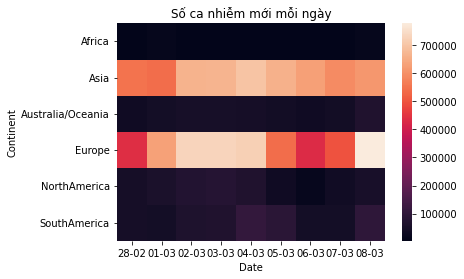

In [28]:
heatmapplot_day_df_NewCases = heatmapplot_day_df.pivot_table(index='Continent',columns='Date',values='NewCases')
ax = sns.heatmap(heatmapplot_day_df_NewCases)
ax.set_title("Số ca nhiễm mới mỗi ngày")